In [226]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
df = pd.read_csv('churn_prediction_cleaned.csv')
df.head()


,age,gender,dependents,occupation,customer_nw_category,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,66,Male,0.0,self_employed,2,1458.71,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,35,Male,0.0,self_employed,2,5390.37,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,31,Male,0.0,salaried,2,3913.16,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,90,NaN,NaN,self_employed,2,2291.91,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,42,Male,2.0,self_employed,3,927.72,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [228]:
df_clean = df.copy()

In [229]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     28382 non-null  int64  
 1   gender                  27857 non-null  object 
 2   dependents              25919 non-null  float64
 3   occupation              28302 non-null  object 
 4   customer_nw_category    28382 non-null  int64  
 5   current_balance         28382 non-null  float64
 6   current_month_credit    28382 non-null  float64
 7   previous_month_credit   28382 non-null  float64
 8   current_month_debit     28382 non-null  float64
 9   previous_month_debit    28382 non-null  float64
 10  current_month_balance   28382 non-null  float64
 11  previous_month_balance  28382 non-null  float64
 12  churn                   28382 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 2.8+ MB


In [230]:
df_clean.isnull().sum()

age                          0
gender                     525
dependents                2463
occupation                  80
customer_nw_category         0
current_balance              0
current_month_credit         0
previous_month_credit        0
current_month_debit          0
previous_month_debit         0
current_month_balance        0
previous_month_balance       0
churn                        0
dtype: int64

Tratamiento de missings

In [231]:
df_clean["gender"].fillna(method='bfill', inplace=True)

In [232]:
df_dependents_mean = int(df_clean["dependents"].mean())
df_clean["dependents"].fillna(df_dependents_mean, inplace=True)

In [233]:
df_clean["occupation"].fillna(method='bfill', inplace=True)

Análisis de conjunto de datos

In [234]:
import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    )

fig.add_trace(go.Box(x=df_clean['churn'], y=df_clean['age']))

fig.update_layout(xaxis_title='churn', yaxis_title='age')

fig.show()


Cantidad de fuga por género

<AxesSubplot: xlabel='gender', ylabel='count'>

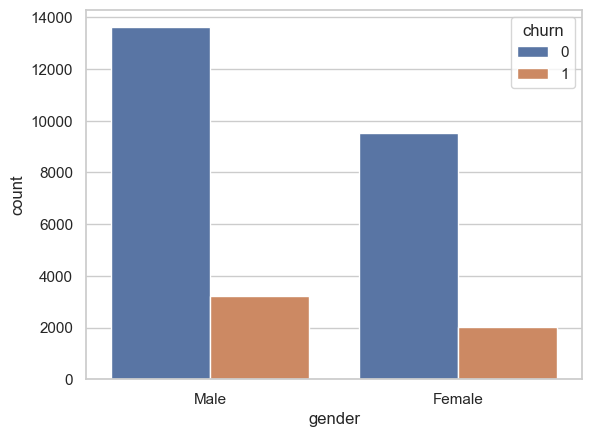

In [235]:
sns.countplot(data=df_clean, x='gender', hue='churn')


Cantidad de dependientes de clientes que fugaron

<AxesSubplot: title={'center': 'Dependents Quantity of Churned Clients'}, xlabel='Dependents', ylabel='Count'>

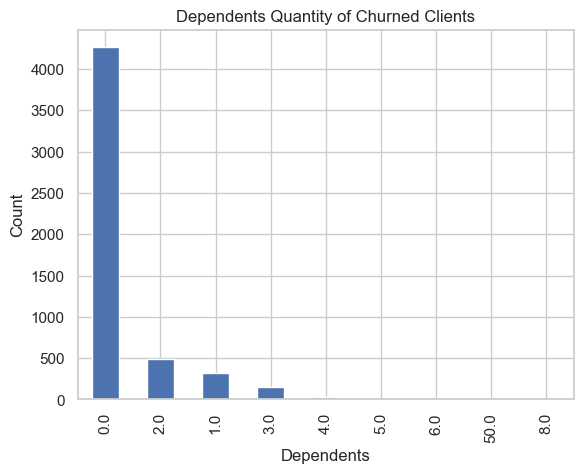

In [236]:
churned_clients = df_clean[df_clean['churn'] == 1]
dependents_churned = churned_clients['dependents'].value_counts()
dependents_churned.plot(kind='bar', xlabel='Dependents', ylabel='Count', title='Dependents Quantity of Churned Clients')


Gráfico de barras para analizar occupation vs churn

<AxesSubplot: title={'center': 'occupation Quantity of Churned Clients'}, xlabel='occupation', ylabel='Count'>

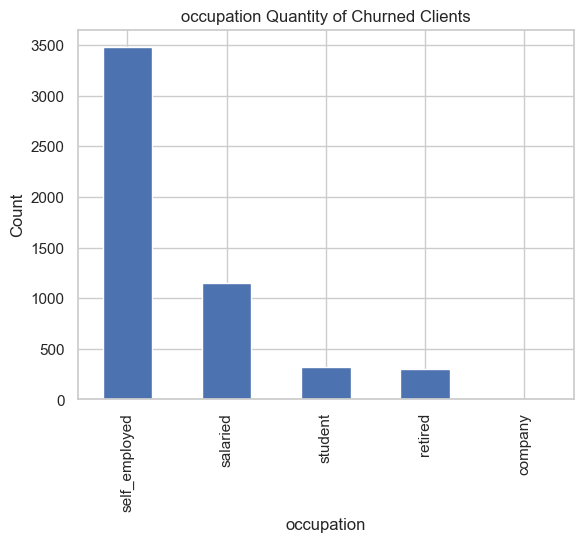

In [237]:
occupation_churned = churned_clients['occupation'].value_counts()
occupation_churned.plot(kind='bar', xlabel='occupation', ylabel='Count', title='occupation Quantity of Churned Clients')


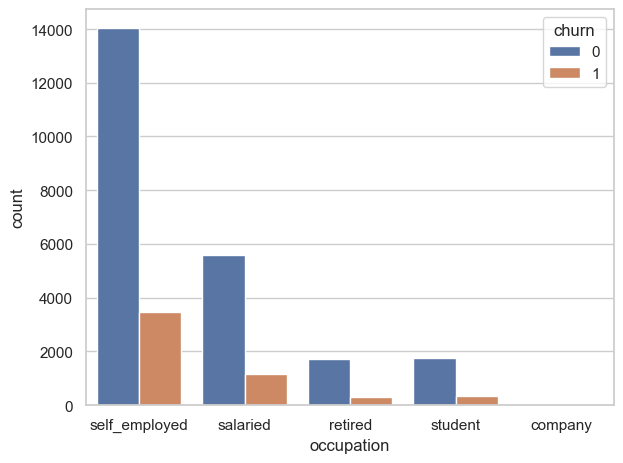

In [238]:
sns.countplot(x = 'occupation', hue = 'churn', data = df_clean)
plt.tight_layout()
plt.show()

Comparación del promedio balance de los clientes y su relacion con la fuga

<AxesSubplot: title={'center': 'Promedio de Balance de los Clientes'}, xlabel='Churn', ylabel='Balance'>

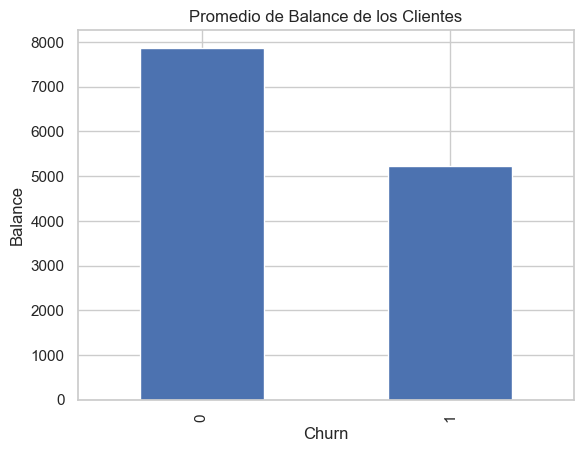

In [239]:
promedio_balance = df_clean.groupby('churn')['current_balance'].mean()
promedio_balance.plot(kind='bar', xlabel='Churn', ylabel='Balance', title='Promedio de Balance de los Clientes')

Categoría patrimonial del cliente vs fuga

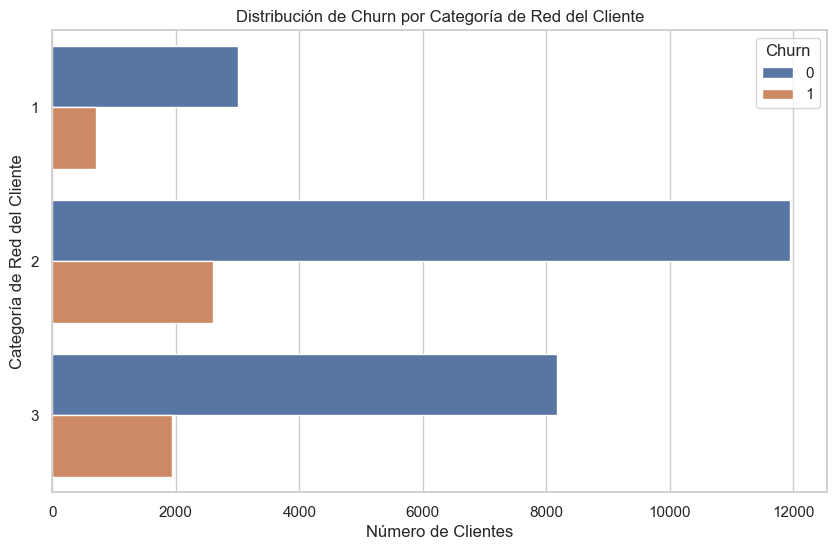

In [240]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))  
sns.countplot(data=df_clean, y='customer_nw_category', hue='churn')

plt.xlabel('Número de Clientes')
plt.ylabel('Categoría de Red del Cliente')
plt.title('Distribución de Churn por Categoría de Red del Cliente')

plt.legend(title='Churn', loc='upper right')
plt.show()


Matriz de correlacion

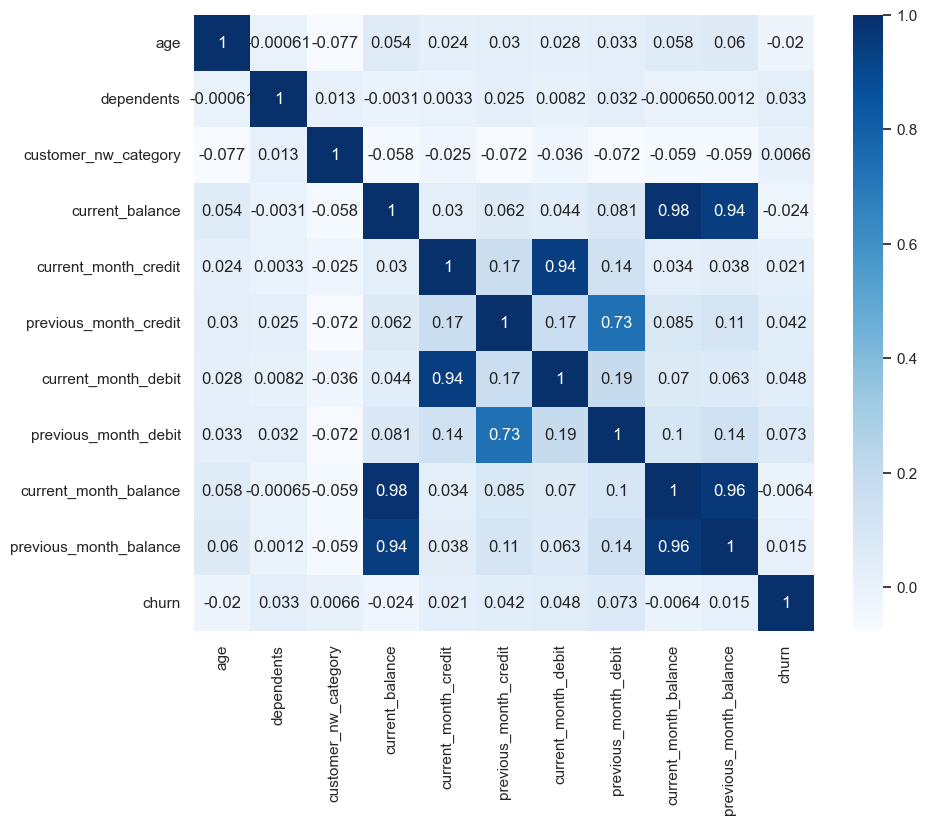

In [255]:
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()


Transformaciones de variables

In [242]:
df_clean["gender"].value_counts()

gender
Male      16848
Female    11534
Name: count, dtype: int64

In [243]:
df_clean["occupation"].value_counts()

occupation
self_employed    17521
salaried          6728
student           2062
retired           2031
company             40
Name: count, dtype: int64

In [244]:
gender_dummies = pd.get_dummies(df_clean["gender"],dtype=int)
occupation_dummies = pd.get_dummies(df_clean["occupation"],dtype=int)
occupation_dummies.head(2)

,company,retired,salaried,self_employed,student
0,0,0,0,1,0
1,0,0,0,1,0


In [245]:
df_clean = pd.concat([df_clean, gender_dummies, occupation_dummies], axis=1)
df_clean.drop(['gender', 'occupation'], axis=1, inplace=True)
df_clean.head()

,age,dependents,customer_nw_category,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Female,Male,company,retired,salaried,self_employed,student
0,66,0.0,2,1458.71,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1,0,0,0,1,0
1,35,0.0,2,5390.37,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1,0,0,0,1,0
2,31,0.0,2,3913.16,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1,0,0,1,0,0
3,90,0.0,2,2291.91,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1,0,0,0,1,0
4,42,2.0,3,927.72,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1,0,0,0,1,0


In [246]:
df_clean["dependents"] = df_clean["dependents"].astype('int64')
df_clean.head()


,age,dependents,customer_nw_category,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Female,Male,company,retired,salaried,self_employed,student
0,66,0,2,1458.71,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1,0,0,0,1,0
1,35,0,2,5390.37,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1,0,0,0,1,0
2,31,0,2,3913.16,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1,0,0,1,0,0
3,90,0,2,2291.91,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1,0,0,0,1,0
4,42,2,3,927.72,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1,0,0,0,1,0


División en conjunto de entrenamiento y prueba

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X = df_clean.drop(['churn'], axis=1)
y = df_clean['churn']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def evaluate_random_forest(criterion):
    rf = RandomForestClassifier(criterion=criterion)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return classification_report(y_test, y_pred)

criterion = ['gini', 'entropy','log_loss']

for i in criterion:
    print(f"Classification report for criterion = {i}")
    print(evaluate_random_forest(i))
    print("---------------------------------------------------------")



Classification report for criterion = gini
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4639
           1       0.72      0.41      0.52      1038

    accuracy                           0.86      5677
   macro avg       0.80      0.69      0.72      5677
weighted avg       0.85      0.86      0.85      5677

---------------------------------------------------------
Classification report for criterion = entropy
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4639
           1       0.72      0.42      0.53      1038

    accuracy                           0.86      5677
   macro avg       0.80      0.69      0.72      5677
weighted avg       0.85      0.86      0.85      5677

---------------------------------------------------------
Classification report for criterion = log_loss
              precision    recall  f1-score   support

           0       0.88      0.96      

In [251]:
print("Accuracy Score of Random Forest Classifier: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test, y_pred))
print("Classification Report of Random Forest Classifier: \n", classification_report(y_test, y_pred))


Accuracy Score of Random Forest Classifier:  0.8615465915096001
Confusion Matrix of Random Forest Classifier: 
 [[4471  168]
 [ 618  420]]
Classification Report of Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      4639
           1       0.71      0.40      0.52      1038

    accuracy                           0.86      5677
   macro avg       0.80      0.68      0.72      5677
weighted avg       0.85      0.86      0.85      5677

